In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import Perceptron


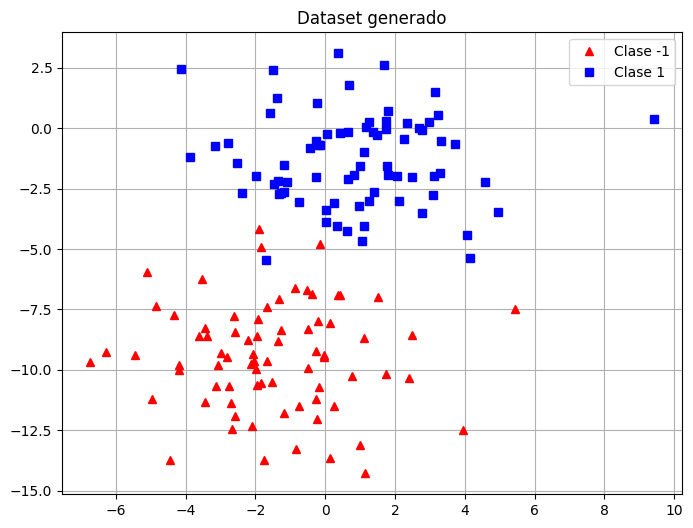

In [3]:
                   # Generar el dataset de dos clases
X, y = datasets.make_blobs(
    n_samples=150,
    n_features=2,
    centers=2,
    cluster_std=2.05,
    random_state=2
)

# Convertir etiquetas 0 → -1
y[y == 0] = -1

# Visualización inicial
plt.figure(figsize=(8,6))
plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], 'r^', label='Clase -1')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs', label='Clase 1')
plt.legend()
plt.title("Dataset generado")
plt.grid(True)
plt.show()

In [4]:
clf = Perceptron(max_iter=1000, eta0=1.0, random_state=0)
clf.fit(X, y)

print("Pesos aprendidos (sklearn):", clf.coef_)
print("Bias aprendido (sklearn):", clf.intercept_)

Pesos aprendidos (sklearn): [[5.90070288 8.62520437]]
Bias aprendido (sklearn): [45.]


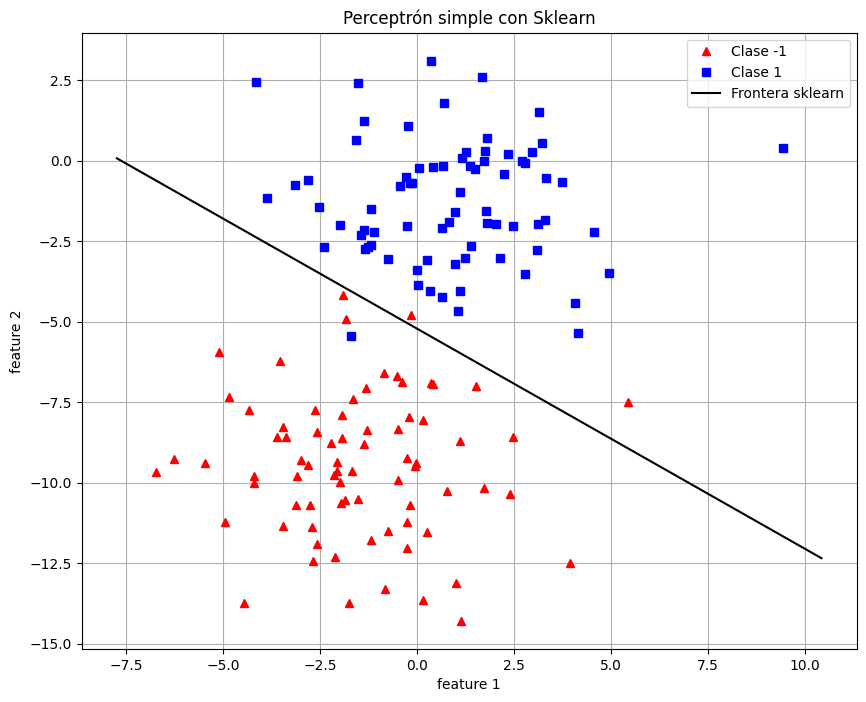

In [5]:
plt.figure(figsize=(10, 8))

plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], 'r^', label='Clase -1')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs', label='Clase 1')

w1, w2 = clf.coef_[0]
b = clf.intercept_[0]

x_vals = np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200)
y_vals = -(w1*x_vals + b) / w2

plt.plot(x_vals, y_vals, 'k-', label='Frontera sklearn')

plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title("Perceptrón simple con Sklearn")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
clf = Perceptron(max_iter=1000, eta0=1.0, random_state=0)
clf.fit(X, y)

print("Pesos aprendidos (sklearn):", clf.coef_)
print("Bias aprendido (sklearn):", clf.intercept_)
print("Costo (errores de clasificación):", (clf.predict(X) != y).mean())

Pesos aprendidos (sklearn): [[5.90070288 8.62520437]]
Bias aprendido (sklearn): [45.]
Costo (errores de clasificación): 0.02


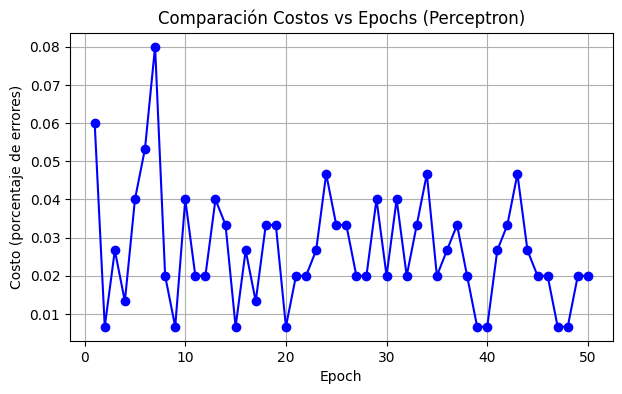

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

# ==========================
# CONFIGURACIÓN
# ==========================
epochs = 50
clf = Perceptron(max_iter=1, eta0=1.0, random_state=0)

# Entrenamiento inicial obligatorio para usar partial_fit
clf.partial_fit(X, y, classes=np.unique(y))

costos = []

# ==========================
# ENTRENAR EPCH POR EPOCH
# ==========================
for e in range(epochs):
    pred = clf.predict(X)
    error = np.mean(pred != y)      # porcentaje de errores
    costos.append(error)

    clf.partial_fit(X, y)           # una pasada sobre los datos

# ==========================
# GRAFICAR
# ==========================
plt.figure(figsize=(7,4))
plt.plot(range(1, epochs+1), costos, marker='o', linestyle='-', color='blue')
plt.title("Comparación Costos vs Epochs (Perceptron)")
plt.xlabel("Epoch")
plt.ylabel("Costo (porcentaje de errores)")
plt.grid(True)
plt.show()